In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [24]:
pwd

'C:\\Users\\Neha Sharma\\Desktop\\COURSES\\AI\\FINAL PROJECT\\Machine Learning Approach For Predicting The Price Of Natural Gas\\5.Project Executable Files'

In [25]:
data= pd.read_csv(r"daily_csv.csv")

In [26]:
data.head

<bound method NDFrame.head of             Date  Price
0     1997-01-07   3.82
1     1997-01-08   3.80
2     1997-01-09   3.61
3     1997-01-10   3.92
4     1997-01-13   4.00
...          ...    ...
5933  2020-08-05   2.23
5934  2020-08-06   2.26
5935  2020-08-07   2.15
5936  2020-08-10   2.18
5937  2020-08-11   2.19

[5938 rows x 2 columns]>

In [27]:
data.describe()

,Price
count,5937.00000
mean,4.18923
std,2.19121
min,1.05000
25%,2.66000
50%,3.54000
75%,5.24000
max,18.48000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5938 non-null   object 
 1   Price   5937 non-null   float64
dtypes: float64(1), object(1)
memory usage: 92.9+ KB


In [29]:
df = pd.DataFrame(data)
missing_data_rows = df[df.isna().any(axis=1)]
print(missing_data_rows)

            Date  Price
5284  2018-01-05    NaN


In [30]:
df.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [31]:
df_2 = df.dropna()

In [32]:
missing_data_rows = df_2[df_2.isna().any(axis=1)]
print(missing_data_rows)

Empty DataFrame
Columns: [Date, Price]
Index: []


In [33]:
df_2.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [34]:
df_2['Date'] = pd.to_datetime(df_2['Date'], infer_datetime_format=True)

# Extract year, month, and day from the 'Date' column
df_2['year'] = df_2['Date'].dt.year
df_2['month'] = df_2['Date'].dt.month
df_2['day'] = df_2['Date'].dt.day

# Drop the original 'Date' column if not needed
df_2.drop(columns=['Date'], inplace=True)

# Display the updated DataFrame
print(df_2.head())

   Price  year  month  day
0   3.82  1997      1    7
1   3.80  1997      1    8
2   3.61  1997      1    9
3   3.92  1997      1   10
4   4.00  1997      1   13


C:\Temp\ipykernel_23844\88103813.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_2['Date'] = pd.to_datetime(df_2['Date'], infer_datetime_format=True)
C:\Temp\ipykernel_23844\88103813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Date'] = pd.to_datetime(df_2['Date'], infer_datetime_format=True)
C:\Temp\ipykernel_23844\88103813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [35]:
'''df_2=pd.get_dummies(df_2,columns=['Date'],dtype=int)'''

"df_2=pd.get_dummies(df_2,columns=['Date'],dtype=int)"

In [36]:
df_2.head

<bound method NDFrame.head of       Price  year  month  day
0      3.82  1997      1    7
1      3.80  1997      1    8
2      3.61  1997      1    9
3      3.92  1997      1   10
4      4.00  1997      1   13
...     ...   ...    ...  ...
5933   2.23  2020      8    5
5934   2.26  2020      8    6
5935   2.15  2020      8    7
5936   2.18  2020      8   10
5937   2.19  2020      8   11

[5937 rows x 4 columns]>

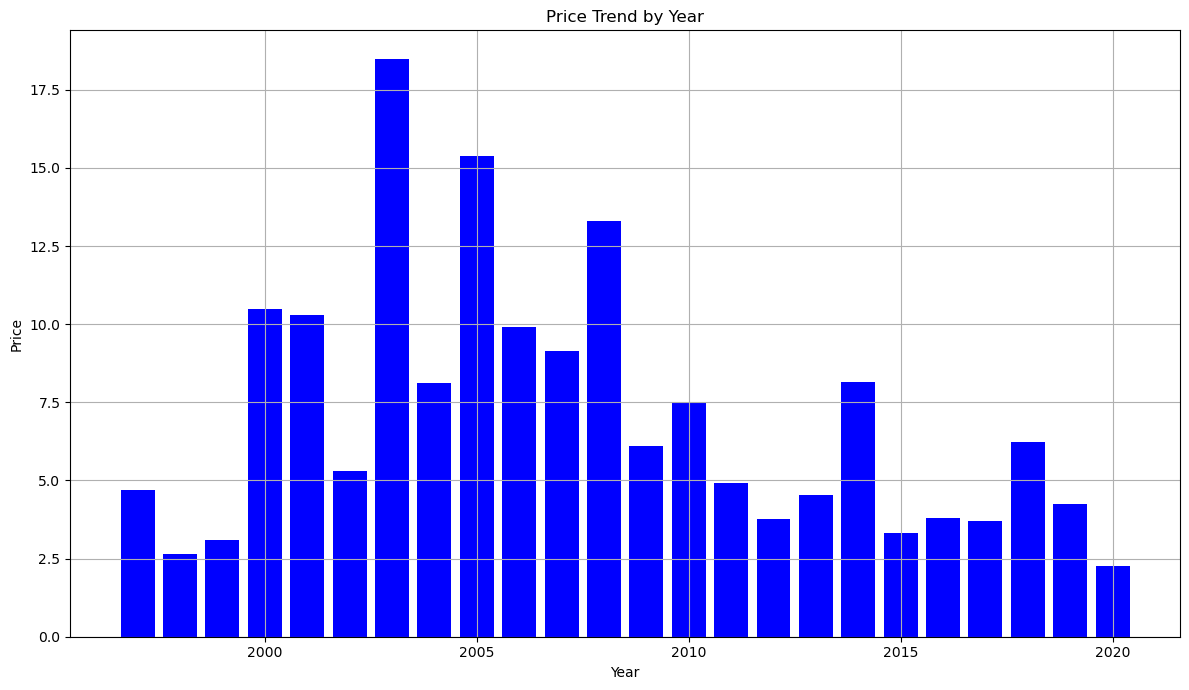

In [37]:
# Assuming df has 'year' and 'Price' columns
plt.figure(figsize=(12, 7))
plt.bar(df_2['year'], df_2['Price'],color='b')
plt.title('Price Trend by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


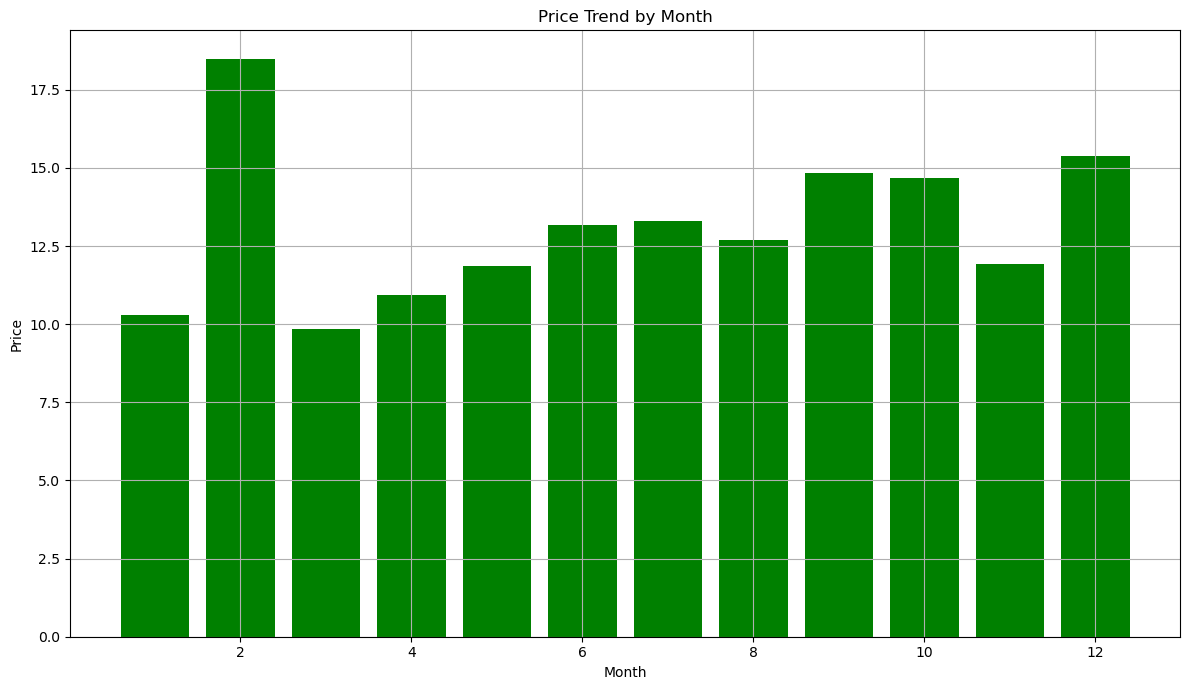

In [38]:
# Assuming df has 'month' and 'Price' columns
plt.figure(figsize=(12, 7))
plt.bar(df_2['month'], df_2['Price'],color='g')
plt.title('Price Trend by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


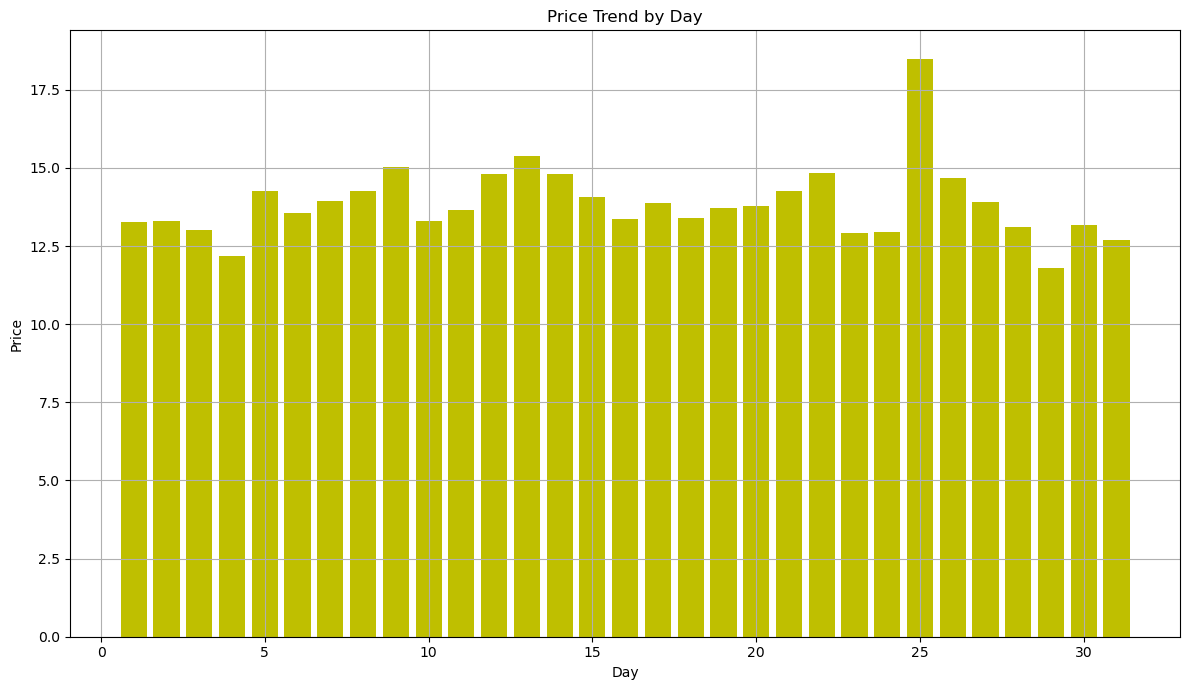

In [39]:
# Assuming df has 'day' and 'Price' columns
plt.figure(figsize=(12, 7))
plt.bar(df_2['day'], df_2['Price'],color='y')
plt.title('Price Trend by Day')
plt.xlabel('Day')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
from sklearn.model_selection import train_test_split

X = df_2[['year', 'month', 'day']]  
y = df_2['Price']                   

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set - Features:", X_train.shape, "Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Labels:", y_test.shape)


Training set - Features: (4749, 3) Labels: (4749,)
Testing set - Features: (1188, 3) Labels: (1188,)


In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.09586742424242424


In [42]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f'R-squared (R2) Score: {r2:.4f}')

R-squared (R2) Score: 0.9814


In [43]:
pickle.dump(regressor,open('model.pkl','wb'))

In [44]:
model=pickle.load(open('model.pkl','rb'))

In [45]:
print(model.predict(X_test))

[6.28 3.39 2.94 ... 3.55 3.29 4.24]


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
ypred = lr.predict(X_test)

In [58]:
ypred

array([4.45282588, 4.05787683, 3.74130395, ..., 4.14557995, 4.11678668,
       3.98965119])

In [59]:
from sklearn.metrics import r2_score
acc = r2_score(y_pred,y_test)
acc

0.9808376083629289

In [69]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [73]:
from sklearn.model_selection import GridSearchCV
param_space = {'copy_X': [True,False], 'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 'positive': [True,False]}
grid_search = GridSearchCV(lr, param_space, cv=5)

grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.032457590729715526
